In [1]:
import itertools
import random
import time
import matplotlib.pyplot as plt

def knapsack_bottom_up(items_weight, items_value, knapsack_capacity):
    num_items = len(items_weight)
    dp_table = [[0 for _ in range(knapsack_capacity + 1)] for _ in range(num_items + 1)]

    for i in range(1, num_items + 1):
        for w in range(1, knapsack_capacity + 1):
            if items_weight[i - 1] <= w:
                dp_table[i][w] = max(items_value[i - 1] + dp_table[i - 1][w - items_weight[i - 1]], dp_table[i - 1][w])
            else:
                dp_table[i][w] = dp_table[i - 1][w]

    return dp_table[num_items][knapsack_capacity]

def knapsack_Top_down(items_weight, items_value, knapsack_capacity, current_index, memo):
    if current_index < 0 or current_index >= len(items_weight):
        return 0

    if (current_index, knapsack_capacity) in memo:
        return memo[(current_index, knapsack_capacity)]

    values = 0
    if items_weight[current_index] <= knapsack_capacity:
        values = items_value[current_index] + knapsack_Top_down(
            items_weight, items_value, knapsack_capacity - items_weight[current_index], current_index + 1, memo)

    values1 = knapsack_Top_down(items_weight, items_value, knapsack_capacity, current_index + 1, memo)

    memo[(current_index, knapsack_capacity)] = max(values, values1)
    return memo[(current_index, knapsack_capacity)]

def knapsack_exhaustive_search(weights, values, capacity):
    n = len(weights)
    best_value = 0
    best_combination = None

    for combination in itertools.product([0, 1], repeat=n):
        total_weight = sum(combination[i] * weights[i] for i in range(n))
        total_value = sum(combination[i] * values[i] for i in range(n))

        if total_weight <= capacity and total_value > best_value:
            best_value = total_value
            best_combination = combination

    return best_value, best_combination

def main():
    items_weight = [4, 2, 6, 8]
    items_value = [15, 25, 40, 35]
    knapsack_capacity = 7

    # Verify correctness
    Bottomup_result = knapsack_bottom_up(items_weight, items_value, knapsack_capacity)
    Topdown_result = knapsack_Top_down(items_weight, items_value, knapsack_capacity, 0, {})

    print("Topdown approach Result:", Topdown_result)
    print("Bottomup approach Result:", Bottomup_result)

    if Bottomup_result == Topdown_result:
        print("Results match.")
    else:
        print("Results do not match.")

    # Test Exhaustive Search
    result_value, result_combination = knapsack_exhaustive_search(items_weight, items_value, knapsack_capacity)
    print("Best value (Exhaustive Search):", result_value)
    print("Selected items (Exhaustive Search):", result_combination)

if __name__ == "__main__":
    main()

Topdown approach Result: 40
Bottomup approach Result: 40
Results match.
Best value (Exhaustive Search): 40
Selected items (Exhaustive Search): (0, 0, 1, 0)


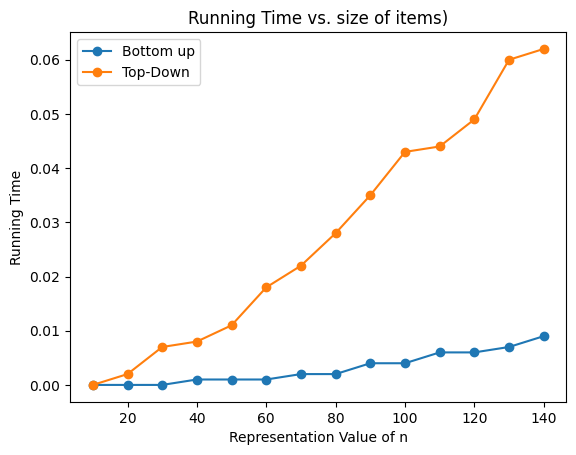

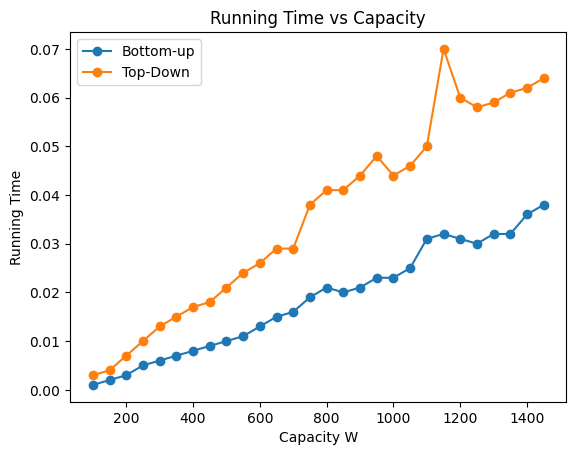

In [2]:
#2nd with constant W
import matplotlib.pyplot as plt
import numpy as np
import random
import time

def constantW():
  n=[x for x in range(10,150,10)]
  W=500
  size=[]
  exectime=[]
  exec_bottom_up=[]
  for i in n:
    weight = [random.randint(1, 15) for _ in range(i)]
    value = [random.randint(1, 25) for _ in range(i)]
    start_time=time.time()
    knapsack_Top_down(weight,value, W,0,{})
    endtime=time.time()
    exectime.append(endtime-start_time)
    start_time1=time.time()
    knapsack_bottom_up(weight,value,i)
    endTime2=time.time()
    exec_bottom_up.append(endTime2-start_time1)
    size.append(i)
  plt.plot(size,exec_bottom_up,label='Bottom up', marker='o')
  plt.plot(size,exectime,label='Top-Down ', marker='o')
  plt.title(f'Running Time vs. size of items)')
  plt.xlabel('Representation Value of n')
  plt.ylabel('Running Time')
  plt.legend()
  plt.show()
constantW()


#constant n
def constantN():
  n=200
  W=[x for x in range(100,1500,50)]
  size=[]
  exectime=[]
  exec_bottom_up=[]
  for i in W:
    weight = [random.randint(1, 150) for i in range(50)]
    value = [random.randint(1, 25) for i in range(50)]
    start_time=time.time()
    knapsack_Top_down(weight,value, i,0,{})
    endtime=time.time()
    exectime.append(endtime-start_time)
    start_time1=time.time()
    knapsack_bottom_up(weight,value,i)
    endTime2=time.time()
    exec_bottom_up.append(endTime2-start_time1)
    size.append(i)
  plt.plot(size,exec_bottom_up,label='Bottom-up', marker='o')
  plt.plot(size,exectime,label='Top-Down ', marker='o')
  plt.title(f'Running Time vs Capacity')
  plt.xlabel('Capacity W')
  plt.ylabel('Running Time')
  plt.legend()
  plt.show()
constantN();

In [ ]:
def constantW_smallWeights():
  n=[x for x in range(1,50)]
  W=30
  size=[]
  exectime=[]
  exec_bottom_up=[]
  for i in n:
    weight = [random.randint(1, 10) for j in range(i)]
    value = [random.randint(1, 25) for j in range(i)]
    start_time=time.time()
    knapsack_Top_down(weight,value,W,0,{})
    endtime=time.time()
    exectime.append(endtime-start_time)
    start_time1=time.time()
    knapsack_bottom_up(weight,value,W)
    endTime2=time.time()
    exec_bottom_up.append(endTime2-start_time1)
    size.append(i)
  plt.plot(size,exec_bottom_up,label='Bottom up')
  plt.plot(size,exectime,label='Top-Down ')
  plt.title(f'Running Time vs size of items (small weights)')
  plt.xlabel('Size of items')
  plt.ylabel('Running Time')
  plt.legend()
  plt.show()

def constantN_smallWeights():
  n=10
  W=[x for x in range(1,1000,20)]
  size=[]
  exectime=[]
  exec_bottom_up=[]
  for i in W:
    weight = [random.randint(1, 10) for k in range(n)]
    value = [random.randint(1, 15) for k in range(n)]
    start_time=time.time()
    knapsack_Top_down(weight,value,i,0,{})
    endtime=time.time()
    exectime.append(endtime-start_time)
    start_time1=time.time()
    knapsack_bottom_up(weight,value,i)
    endTime2=time.time()
    exec_bottom_up.append(endTime2-start_time1)
    size.append(i)
  plt.plot(size,exec_bottom_up,label='Bottom up')
  plt.plot(size,exectime,label='Top-Down ')
  plt.title(f'Running Time vs W (small weights)')
  plt.xlabel('Capacity W')
  plt.ylabel('Running Time')
  plt.legend()
  plt.show()
constantN_smallWeights()
constantW();

In [ ]:
import time
import matplotlib.pyplot as plt

def measure_execution_times_1(values, weights, W):
    start_time_bottom_up = time.time()
    knapsack_bottom_up(values, weights, W)
    end_time_bottom_up = time.time()

    start_time_top_down = time.time()
    knapsack_top_down(values, weights, W)
    end_time_top_down = time.time()

    return end_time_bottom_up - start_time_bottom_up, end_time_top_down - start_time_top_down

def generate_inputs(n, W_size):
    values = [60, 100, 120]  
    weights = [10, 20, 30]   
    W = 2 ** W_size  
    return values, weights, W


def generate_pseudopolynomial_plot():
    W_sizes = list(range(10, 21))  
    bottom_up_execution_times = []
    top_down_execution_times = []

    for W_size in W_sizes:
        values, weights, W = generate_inputs(3, W_size)
        
        bottom_up_execution_time, top_down_execution_time = measure_execution_times_1(values, weights, W)
        
        bottom_up_execution_times.append(bottom_up_execution_time)
        top_down_execution_times.append(top_down_execution_time)

   
    print("Bottom-Up Algorithm:")
    for i in range(0, len(W_sizes)):
      print(W_sizes[i], bottom_up_execution_times[i], end=" ")
    print()
    print("Top-Down Algorithm:")
    for i in range(0, len(W_sizes)):
      print(W_sizes[i], top_down_execution_times[i], end=" ")
    plt.plot(W_sizes, bottom_up_execution_times, label='Bottom-Up Algorithm', marker='o')
    plt.plot(W_sizes, top_down_execution_times, label='Top-Down Algorithm', marker='o')
    
    plt.xlabel('Size of the Representation of W (bits)')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Pseudopolynomial-time Illustration')
    plt.legend()
    plt.show()